In [1]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Using TensorFlow backend.


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

C:\Users\siras\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [2]:
from keras.preprocessing import image
import numpy as np

img_path = 'data/cats_and_dogs/test/cats/cat.1700.jpg'
img = image.load_img(img_path, target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


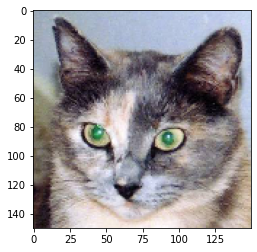

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img_tensor[0])

In [4]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = Model(inputs = model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)

In [6]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


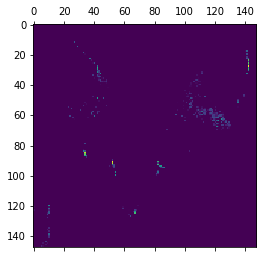

In [10]:
plt.matshow(first_layer_activation[0,:,:,12], cmap='viridis')

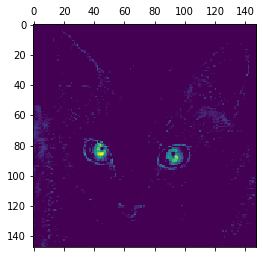

In [11]:
plt.matshow(first_layer_activation[0,:,:,1], cmap='viridis')

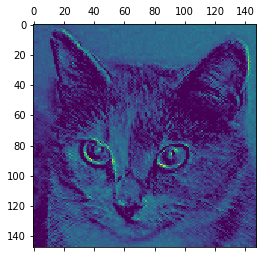

In [12]:
plt.matshow(first_layer_activation[0,:,:,10], cmap='viridis')

In [ ]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

image_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // image